# Capstone Project : Amar Harish Chandan
Apple Stock Price Prediction and Analysis

Step 1: Import Libraries

In [31]:
!pip install tensorflow

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

Step 2: Load the Data

In [33]:
# Load the dataset
df = pd.read_csv('C:\BIA\Capstone BIA\AAPL.csv')

In [34]:
# Read data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


Step 3 : Data Cleaning

In [35]:
#Factual information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [36]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [37]:
# Confirm Conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10468 non-null  datetime64[ns]
 1   Open       10468 non-null  float64       
 2   High       10468 non-null  float64       
 3   Low        10468 non-null  float64       
 4   Close      10468 non-null  float64       
 5   Adj Close  10468 non-null  float64       
 6   Volume     10468 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 572.6 KB


In [38]:
# Check for null values
null_values = df.isnull().sum()
print(null_values)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [39]:
# Ensure data is sorted by date
df = df.sort_values('Date')

In [40]:
# Confrim Sorting
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


Step 4: Exploratory Data Analysis (EDA)

In [41]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,10468,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,2001-09-07 05:59:43.492548608,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
min,1980-12-12 00:00:00,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,1991-04-21 06:00:00,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,2001-08-28 12:00:00,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,2012-01-25 06:00:00,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,2022-06-17 00:00:00,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09
std,NaN,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08


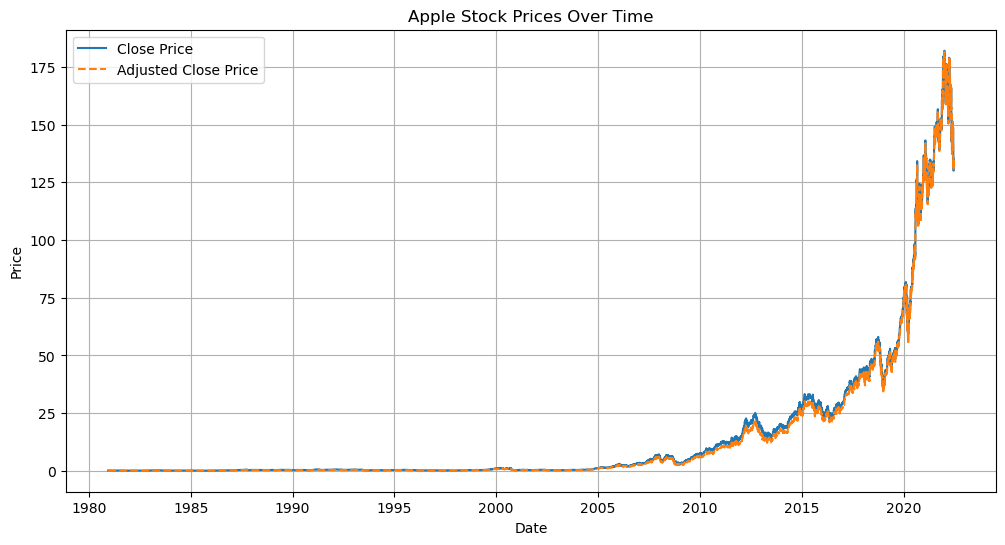

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['Adj Close'], label='Adjusted Close Price', linestyle='--')
plt.title('Apple Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

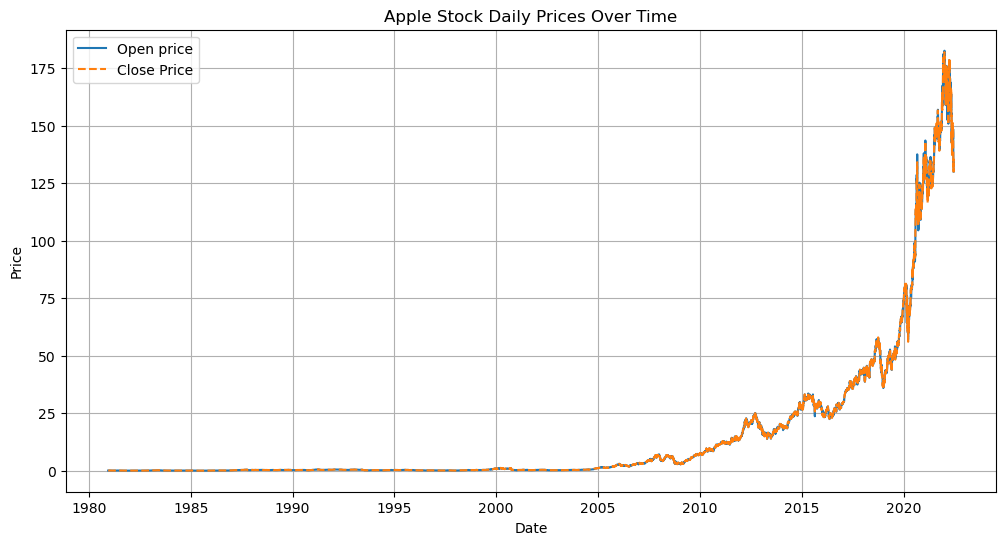

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Open price')
plt.plot(df['Date'], df['Close'], label='Close Price', linestyle='--')
plt.title('Apple Stock Daily Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

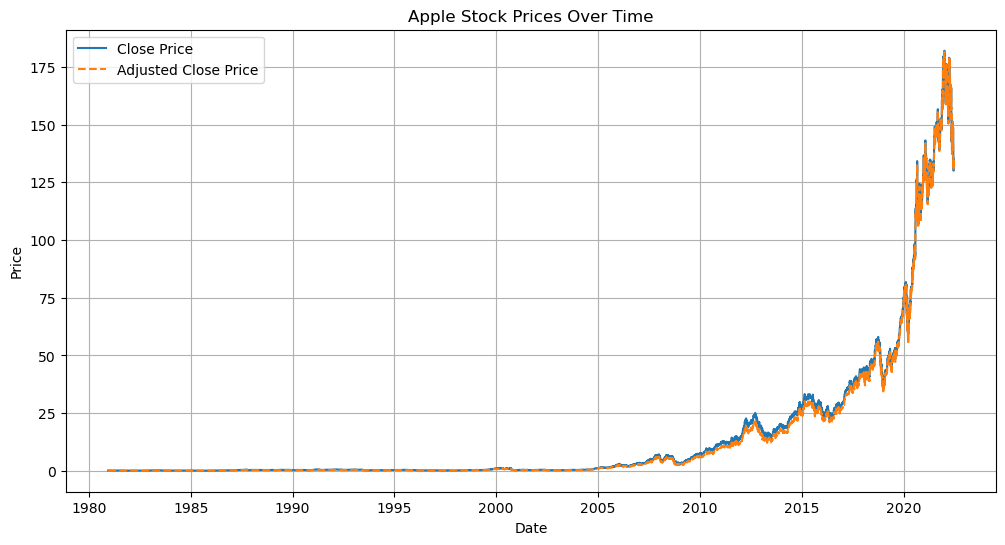

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['Adj Close'], label='Adjusted Close Price', linestyle='--')
plt.title('Apple Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Calculate the daily price movement

In [45]:
# Calculate the daily price movement (Open price - Close price of the previous date)
df['Prev Close'] = df['Close'].shift(1)
df['Daily Price Movement'] = df['Open'] - df['Prev Close']

In [46]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prev Close,Daily Price Movement
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800,0.128348,-0.006138
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,0.121652,-0.008371
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600,0.112723,0.002790
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600,0.115513,0.003349


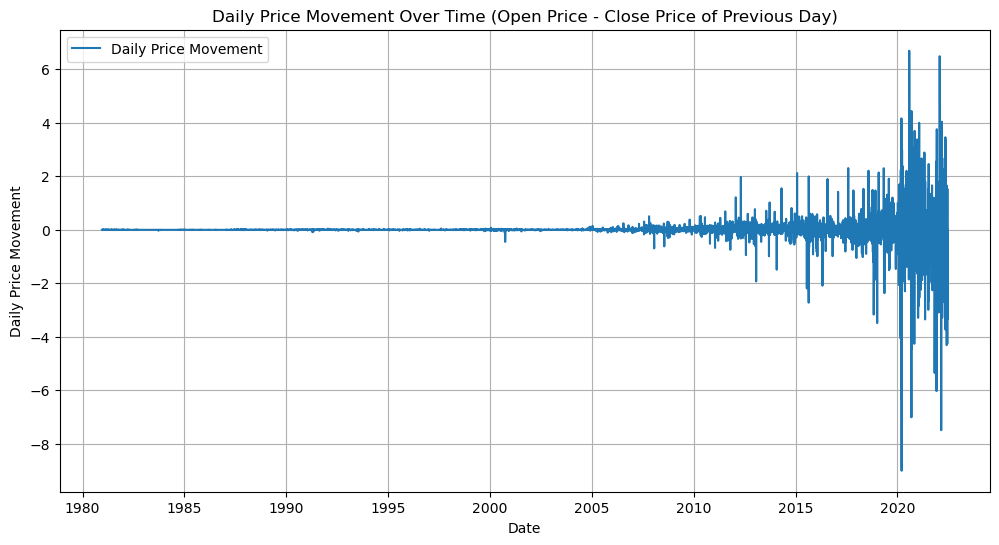

In [47]:
# Plot daily price movement over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily Price Movement'], label='Daily Price Movement', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Daily Price Movement')
plt.title('Daily Price Movement Over Time (Open Price - Close Price of Previous Day)')
plt.legend()
plt.grid(True)
plt.show()

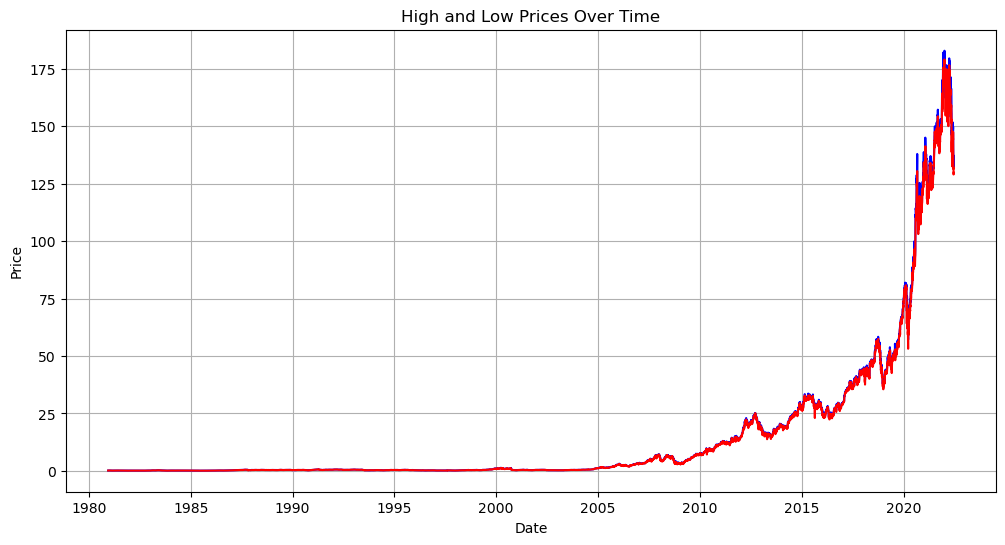

In [48]:
# Plot high and low prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['High'], label='High Price', color='blue')
plt.plot(df['Date'], df['Low'], label='Low Price', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('High and Low Prices Over Time')
plt.grid(True)
plt.show()


Correlation Matrix

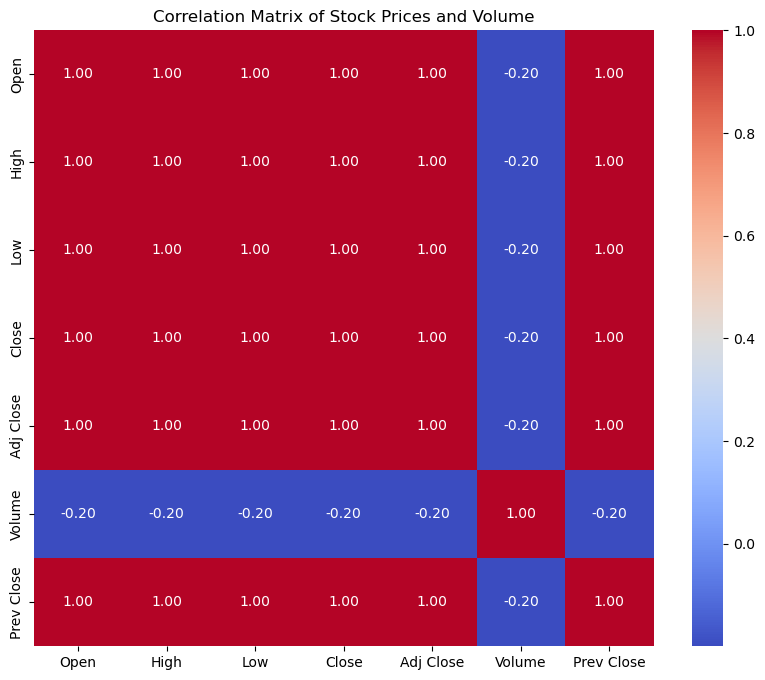

In [49]:
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Prev Close']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Stock Prices and Volume')
plt.show()

20-50-100-200 Day Moving Averages

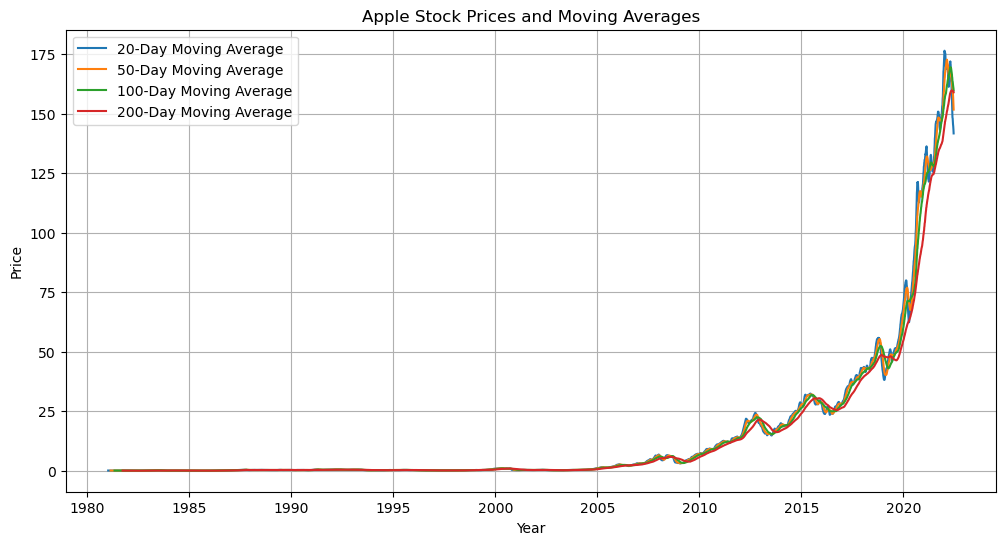

In [50]:
# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()

# Calculate moving averages
df['20-Day MA'] = df['Close'].rolling(window=20).mean()
df['50-Day MA'] = df['Close'].rolling(window=50).mean()
df['100-Day MA'] = df['Close'].rolling(window=100).mean()
df['200-Day MA'] = df['Close'].rolling(window=200).mean()
# Plot moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['20-Day MA'], label='20-Day Moving Average')
plt.plot(df['Date'], df['50-Day MA'], label='50-Day Moving Average')
plt.plot(df['Date'], df['100-Day MA'], label='100-Day Moving Average')
plt.plot(df['Date'], df['200-Day MA'], label='200-Day Moving Average')
plt.title('Apple Stock Prices and Moving Averages')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Step 5: Machine Learning Models

5.1 Linear Regression Model

In [51]:
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
X = df[features]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f'Linear Regression MAE: {mae_lr}, RMSE: {rmse_lr}')


Linear Regression MAE: 9.12660587028249e-14, RMSE: 1.1415453930261582e-13


5.3 Time Series Analysis using LSTM (Long-Short Term Memory Model)

In [52]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

# Create a function to prepare the dataset
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

# Set time_step
time_step = 100

# Create dataset
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)


Build and Train the LSTM Model

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_shape=(16,)))
model.add(Dense(64))


C:\Users\amarh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape=(16,)))
model.add(Dense(32))
model.add(Dense(64))


In [55]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train_lstm, y_train_lstm, batch_size=1, epochs=1)


C:\Users\amarh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8293/8293 ━━━━━━━━━━━━━━━━━━━━ 266s 32ms/step - loss: 4.2180e-05


Evaluate the LSTM Model


Predict the Next 20 Days
To predict the next 20 days, we'll use the last 100 days of data from the dataset.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
            Predicted Close
2022-06-18       127.059196
2022-06-19       125.686111
2022-06-20       124.228889
2022-06-21       122.805641
2022-06-22       121.454353
2022-06-23       120.183296
2022-06-24       118.990379
2022-06-25      

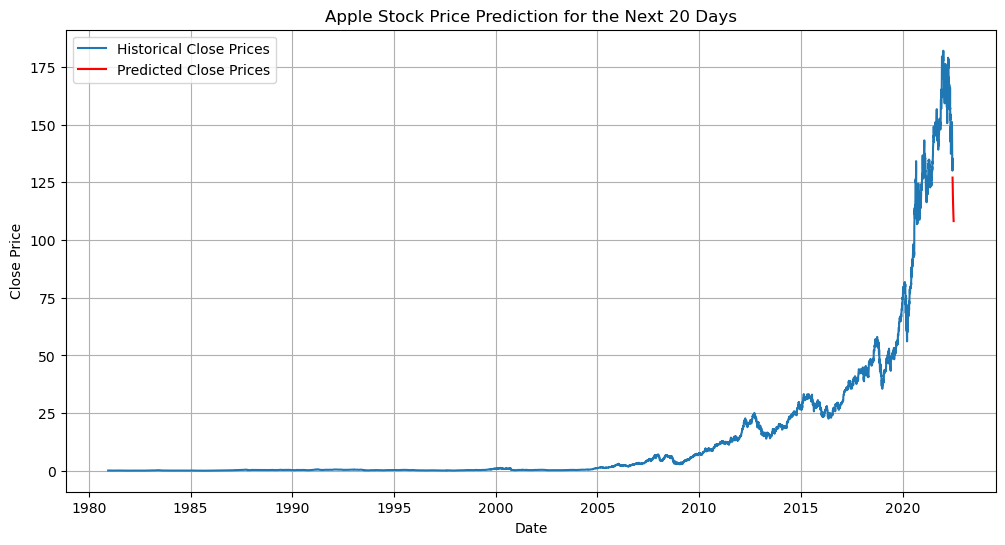

In [57]:
# Get the last 100 days of data
last_100_days = scaled_data[-time_step:]

# Create a list to store the predictions
predictions = []

# Predict the next 20 days
for _ in range(20):
    # Reshape the data to [samples, time steps, features]
    last_100_days_reshaped = last_100_days.reshape(1, time_step, 1)
    
    # Predict the next day
    next_day_prediction = lstm_model.predict(last_100_days_reshaped)
    
    # Append the prediction to the list
    predictions.append(next_day_prediction[0, 0])
    
    # Update the last_100_days array with the new prediction
    last_100_days = np.append(last_100_days, next_day_prediction)
    last_100_days = last_100_days[1:]

# Inverse transform the predictions to get actual values
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Create a DataFrame to store the predictions
prediction_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=20)
predictions_df = pd.DataFrame(data=predictions, index=prediction_dates, columns=['Predicted Close'])

# Display the predictions
print(predictions_df)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Historical Close Prices')
plt.plot(predictions_df.index, predictions_df['Predicted Close'], label='Predicted Close Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Apple Stock Price Prediction for the Next 20 Days')
plt.legend()
plt.grid(True)
plt.show()


Predict the Next 20 Days
To predict the next 20 days, we'll use the last 253 days of data from the dataset.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
            Predicted Close
2022-06-18       127.059196
2022-06-19       125.686111
2022-06-20       124.228889
2022-06-21       122.805641
2022-06-22       121.454353
2022-06-23       120.183296
2022-06-24       118.990379
2022-06-25      

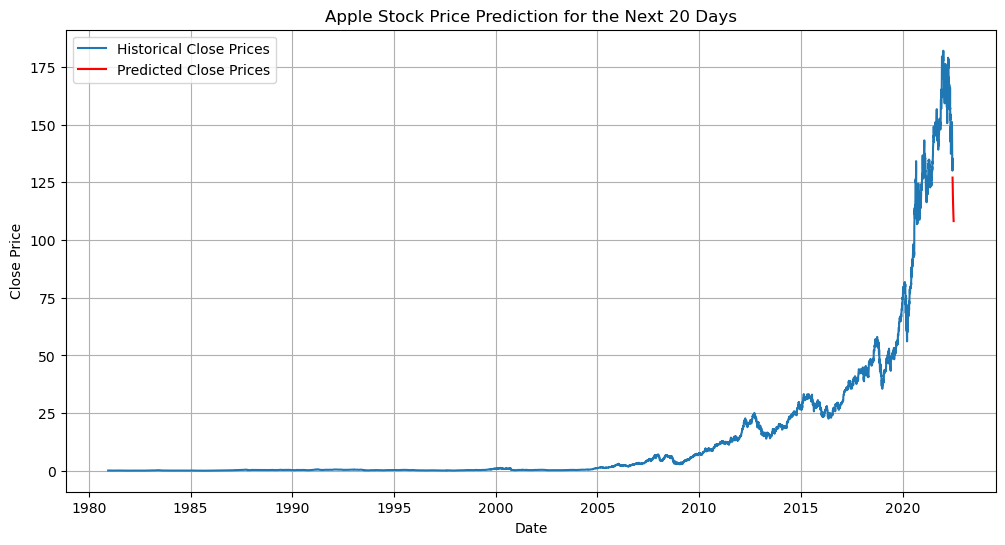

In [58]:
# Get the last 253 days of data
last_253_days = scaled_data[-time_step:]

# Create a list to store the predictions
predictions = []

# Predict the next 20 days
for _ in range(20):
    # Reshape the data to [samples, time steps, features]
    last_253_days_reshaped = last_253_days.reshape(1, time_step, 1)
    
    # Predict the next day
    next_day_prediction = lstm_model.predict(last_253_days_reshaped)
    
    # Append the prediction to the list
    predictions.append(next_day_prediction[0, 0])
    
    # Update the last_253_days array with the new prediction
    last_253_days = np.append(last_253_days, next_day_prediction)
    last_253_days = last_253_days[1:]

# Inverse transform the predictions to get actual values
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Create a DataFrame to store the predictions
prediction_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=20)
predictions_df = pd.DataFrame(data=predictions, index=prediction_dates, columns=['Predicted Close'])

# Display the predictions
print(predictions_df)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Historical Close Prices')
plt.plot(predictions_df.index, predictions_df['Predicted Close'], label='Predicted Close Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Apple Stock Price Prediction for the Next 20 Days')
plt.legend()
plt.grid(True)
plt.show()


In [59]:
# Save the preprocessed data to a CSV file
df.to_csv('AAPL_bi_final.csv', index=False)

In [60]:
# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year
# Group by year and calculate the minimum and maximum prices
yearly_stats = df.groupby('Year').agg({'Close': ['min', 'max']})

# Rename the columns for clarity
yearly_stats.columns = ['Min Price', 'Max Price']

# Calculate the percentage change
yearly_stats['Percentage Change'] = ((yearly_stats['Max Price'] - yearly_stats['Min Price']) / yearly_stats['Min Price']) * 100

# Reset the index to turn the 'Year' index into a column
yearly_stats = yearly_stats.reset_index()
# Display the results
print(yearly_stats)

    Year   Min Price   Max Price  Percentage Change
0   1980    0.112723    0.160714          42.574275
1   1981    0.063616    0.154018         142.105760
2   1982    0.049107    0.151228         207.956096
3   1983    0.079799    0.280134         251.049512
4   1984    0.097656    0.148438          52.000901
5   1985    0.064732    0.136719         111.207749
6   1986    0.098772    0.195313          97.741263
7   1987    0.182478    0.529018         189.907825
8   1988    0.322545    0.421875          30.795703
9   1989    0.301339    0.443080          47.037058
10  1990    0.223214    0.422991          89.500211
11  1991    0.367188    0.649554          76.899572
12  1992    0.386161    0.623884          61.560593
13  1993    0.202009    0.580357         187.292645
14  1994    0.224330    0.386161          72.139705
15  1995    0.284598    0.440848          54.902002
16  1996    0.150670    0.312500         107.406916
17  1997    0.115513    0.260603         125.604910
18  1998    

The End